<a href="https://colab.research.google.com/github/ebartolo783/Se-ales-y-sistemas/blob/main/punto_1_parcial_2_S_Y_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importamos las librerias para graficar
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

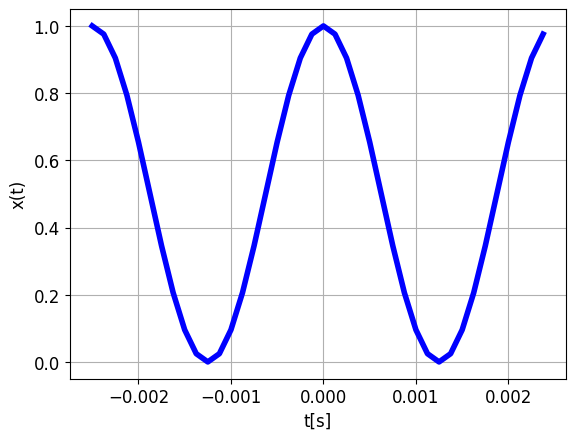

In [ ]:
A = 1 # amplitud de la señal
F0 = 200 # frecuencia Fundamental
T = 1/(2*F0) # Periodo Fundamnetal
Fs = 40*F0   #
tv = np.arange(-T,T,1/Fs) # vector de tiempo
Nm = len(tv)
x = (A*np.cos(2*np.pi*F0*tv))**2 # creamos la señal
#Graficamos la señal
plt.plot(tv,x,'b',linewidth=4)
plt.grid()
plt.xlabel("t[s]",fontsize = 12)
plt.ylabel("x(t)",fontsize = 12)
plt.show()

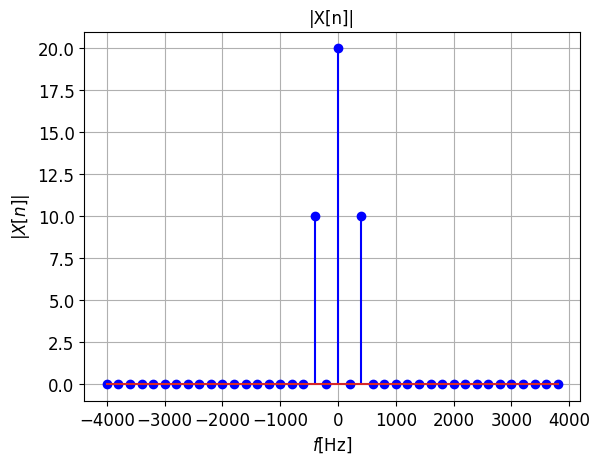

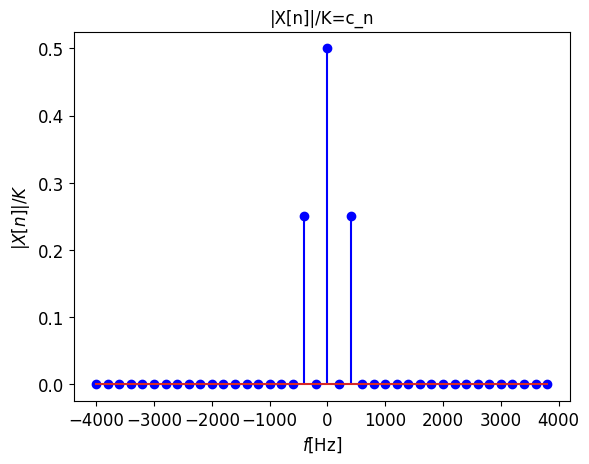

In [ ]:
#cálculo de la FFT de la señal signo invertido
vf = np.fft.fftfreq(len(x),1/Fs) #calculo vector de frecuencias
Xw = np.fft.fft(x) #cálculo FFT

plt.stem(vf,abs(Xw),'b')
plt.title(r'|X[n]|')
plt.xlabel(r'$f$[Hz]',fontsize = 12)
plt.ylabel(r'$|X[n]|$',fontsize = 12)
plt.axis('tight')
plt.grid()
plt.show()
plt.stem(vf,abs(Xw)/len(vf),'b')
plt.title(r'|X[n]|/K=c_n')
plt.xlabel(r'$f$[Hz]',fontsize = 12)
plt.ylabel(r'$|X[n]|/K$',fontsize = 12)
plt.show()

In [ ]:
N = 50 # armonicos que pide el ejercicio
wo = 2*np.pi/T # se define la frecuencia angular
phin = np.zeros((Nm,2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

phin.shape #tamaño matriz phin

(40, 101)

In [ ]:
# graficar bases
from ipywidgets import interact,IntSlider
fig, ax = plt.subplots(1, 1,figsize=(6,3))
def pltbase(n=1):

    plt.plot(tv,np.real(phin[:,int(n+N)]),label="Re{$\phi_n$(t)}")
    plt.xlabel("t[s]",fontsize = 14)
    plt.ylabel("$\phi_n$(t)",fontsize = 14)
    plt.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    plt.grid()
    plt.plot(tv,x,'r',linewidth=4,label='$x(t)$')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.gcf().set_figwidth(6)
    plt.gcf().set_figheight(3)
    plt.show()
    return
interact(pltbase,n=(-N,N,1))

interactive(children=(IntSlider(value=1, description='n', max=50, min=-50), Output()), _dom_classes=('widget-i…

<function __main__.pltbase(n=1)>

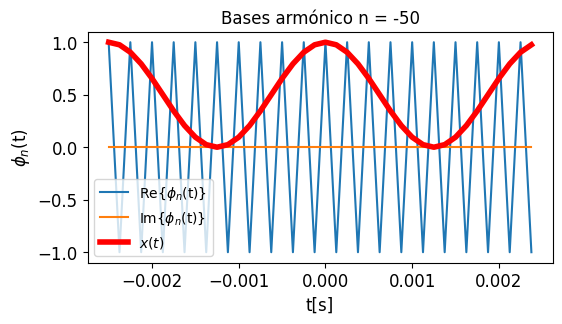

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

#figura y axes animaciónx
fig, ax = plt.subplots(1, 1,figsize=(6,3))
#función para gráfico interactivo
def update(n):
    #actualización regresor Bayesiano
    #Graficar prior
    ax.clear()
    ax.plot(tv,np.real(phin[:,int(n+N)]),label="Re{$\phi_n$(t)}")
    ax.set_xlabel("t[s]",fontsize = 12)
    ax.set_ylabel("$\phi_n$(t)",fontsize = 12)
    ax.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    ax.plot(tv,x,'r',linewidth=4,label='$x(t)$')
    ax.set_title(f'Bases armónico n = {n}')
    ax.legend(loc='lower left')
    plt.show()

#desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(-N,N,1), blit=False)
rc('animation', html='jshtml')

In [ ]:
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn = ((1j*A)/(nv*np.pi))*(1-(-1)**nv)
Cn[N] = 0 # nivel dc C_0

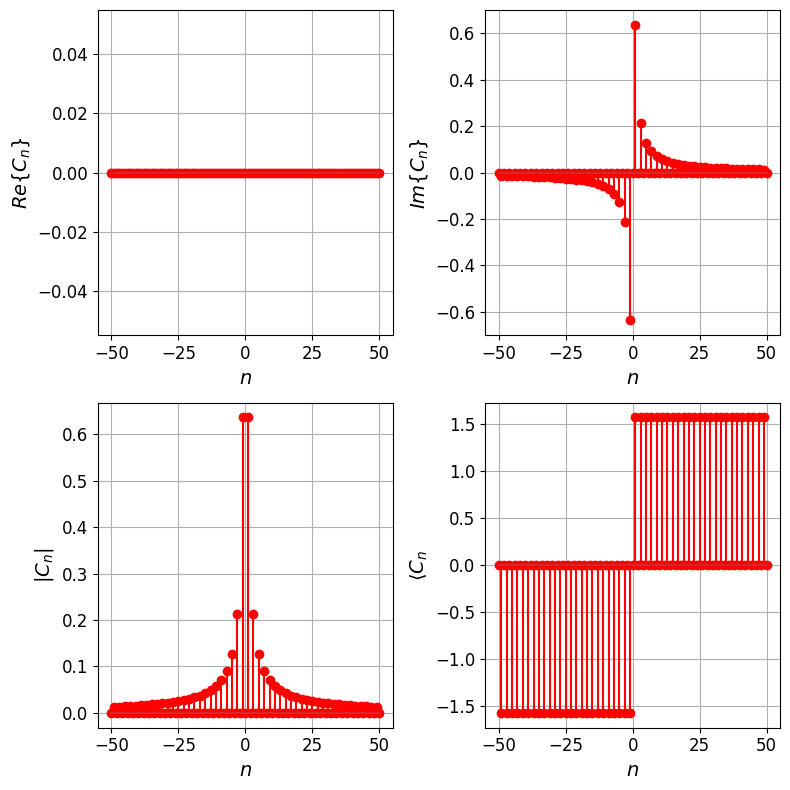

In [ ]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()